# Keras Function API

- Functional API 로 구성 가능한 다양한 Neural Network Models
- Colab에서 작업

conda install pydot   
conda install graphviz

In [1]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM, TimeDistributed

# A. Standard Neural Network Models

## 1. Simple Multi-layer Perceptron
입력층 + 은닉층 + 출력층으로 구성된 Neural Network

In [2]:
inp = Input(shape=(10,))
x = Dense(10, activation='relu')(inp)
x = Dense(20, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inp, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


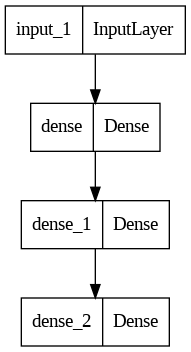

In [3]:
plot_model(model)

## 2. Convolutional Neural Network

In [4]:
inp = Input(shape=(64, 64, 1)) # (64, 64, 1)의 형태를 가진 데이터를 입력
x = Conv2D(32, kernel_size=4, activation='relu')(inp)  # 32개의 4x4 필터를 가지는 Conv층
x = MaxPooling2D(pool_size=(3, 3))(x)  # 3x3 크기의 윈도우를 사용하는 max pooling layer
x = Flatten()(x)
x = Dense(10, activation='relu')(x)  #FC 층
output = Dense(1, activation='sigmoid')(x)   #출력층

# Model 객체를 생성합니다. 입력 레이어와 출력 레이어를 연결.
model = Model(inputs=inp, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 61, 61, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 20, 20, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                128010    
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                           

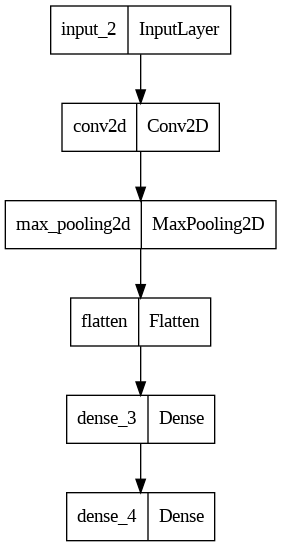

In [5]:
plot_model(model)

## 3. Recurrent Neural Network

In [6]:
#(100, 1)의 형태를 가진 입력 데이터. ex) 100개의 시간 단계를 가진 단변량 시계열 데이터.
inp = Input(shape=(100, 1))

x = LSTM(10)(inp)   # 10개의 유닛을 가진 LSTM 레이어
x = Dense(10, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inp, outputs=output)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 601 (2.35 KB)
Trainable params: 601 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


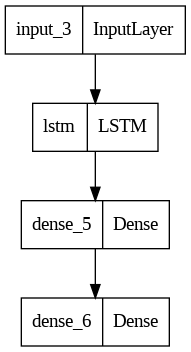

In [7]:
plot_model(model)

# B. Shared Layers Models

-한 layer 의 output 을 여러 layer 가 share하는 모델

- 하나의 image input 을 interpret 하는 kernel size 가 다른 여러개의 convolutional layer 구성

다음은 이 구조가 사용될 수 있는 몇 가지 실제 사례입니다:

- 의료 영상 분석: 의료 영상(예: MRI, X-Ray 등)에서 병변을 탐지하는 데 사용될 수 있습니다. 예를 들어, 암 진단, 뇌졸중 진단 등에서 사용될 수 있습니다.

- 자율 주행 자동차: 자율 주행 자동차는 다양한 카메라와 센서를 통해 주변 환경을 인식하고, 이를 기반으로 결정을 내립니다. 본 모델은 주행 환경의 다양한 측면을 동시에 고려하여 주행에 필요한 결정을 돕습니다.

- 보안 카메라 이미지 분석: 보안 시스템에서는 카메라를 통해 수집한 이미지를 분석하여 의심스러운 활동을 감지합니다. 이 모델은 다양한 크기의 커널을 사용하여 이미지의 다양한 피처를 캡처하고, 이를 분석하여 이상 행동을 감지할 수 있습니다.



In [8]:
inp = Input(shape=(64, 64, 1))  # 64x64 크기의 흑백 이미지

# 첫 번째 피처 추출기
x = Conv2D(32, kernel_size=4, activation='relu')(inp)
x = MaxPooling2D(pool_size=(2, 2))(x)
flat1 = Flatten()(x)

# 두 번째 피처 추출기
x = Conv2D(16, kernel_size=8, activation='relu')(inp)
x = MaxPooling2D(pool_size=(2, 2))(x)
flat2 = Flatten()(x)

# 두 개의 피처 추출기의 출력을 병합
merge = concatenate([flat1, flat2])

# 병합된 피처를 해석하기 위해 밀집 레이어를 추가
x = Dense(10, activation='relu')(merge)

# 출력 레이어를 정의
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inp, outputs=output)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 61, 61, 32)           544       ['input_4[0][0]']             
                                                                                                  
 conv2d_2 (Conv2D)           (None, 57, 57, 16)           1040      ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)           0         ['conv2d_1[0][0]']            
 g2D)                                                                                       

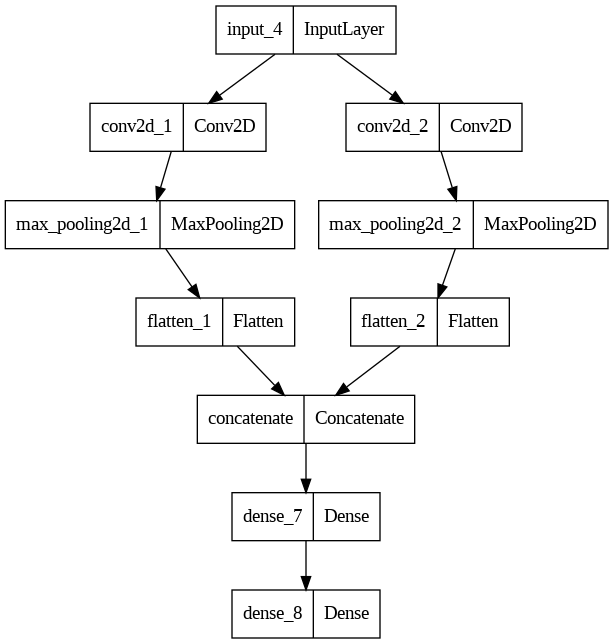

In [9]:
plot_model(model)

## 2. Shared Feature Extraction Layer

- sequence classificaion 의 feature extractor 인 LSTM 의 output 을 interpret 하는 두개의 병렬 submodels  

이러한 유형의 모델은 다음과 같은 다양한 상황에서 사용될 수 있습니다:

- 금융 시장 예측: 시계열 데이터를 다루는 가장 대표적인 사례 중 하나는 주식 가격, 환율, 투자 포트폴리오 등의 금융 시장 예측입니다. 본 모델은 다양한 피처를 동시에 고려하여 최종 예측을 생성하므로 금융 시장의 복잡성을 모델링하는데 유용할 수 있습니다.

- 자연어 처리 (NLP): 본 모델은 문장 또는 문서의 연속성을 다루는 NLP 작업에 적용될 수 있습니다. 예를 들어, 감정 분석, 텍스트 생성, 기계 번역 등의 작업에서 본 모델을 활용할 수 있습니다. 여기서 두 개의 해석기는 각각 문장의 다른 측면을 캡처하며, 이들을 병합하여 더 정확한 결과를 생성할 수 있습니다.

- 센서 데이터 처리: IoT (Internet of Things) 장치에서 수집한 시계열 센서 데이터를 처리하는데 이 모델을 사용할 수 있습니다. 본 모델은 센서 데이터의 패턴을 파악하고, 예를 들어 이상 징후를 감지하거나 미래의 센서 값들을 예측하는 데 사용될 수 있습니다.

In [10]:
# 100개의 시간 단계를 가진 단변량 시계열 데이터를 가정
inp = Input(shape=(100, 1))

# 10개의 유닛을 가진 LSTM 피처 추출기
extract1 = LSTM(10)(inp)

# 첫 번째 인터프리터를 정의
interp1 = Dense(10, activation='relu')(extract1)

# 두 번째 인터프리터를 정의
x = Dense(10, activation='relu')(extract1)
x= Dense(20, activation='relu')(x)
interp2 = Dense(10, activation='relu')(x)

# 두 개의 인터프리터의 출력을 병합
merge = concatenate([interp1, interp2])

# 출력 레이어를 정의
output = Dense(1, activation='sigmoid')(merge)

model = Model(inputs=inp, outputs=output)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 100, 1)]             0         []                            
                                                                                                  
 lstm_1 (LSTM)               (None, 10)                   480       ['input_5[0][0]']             
                                                                                                  
 dense_10 (Dense)            (None, 10)                   110       ['lstm_1[0][0]']              
                                                                                                  
 dense_11 (Dense)            (None, 20)                   220       ['dense_10[0][0]']            
                                                                                            

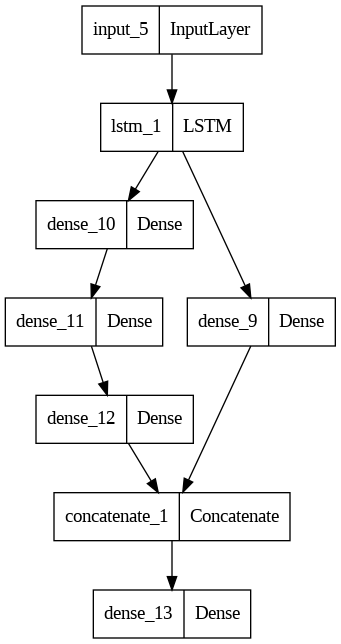

In [11]:
plot_model(model)

# C. Multiple Input and Output Models

## 1. Multiple Input Model

- 다른 크기의 두가지 version 의 image 를 input 으로 받아서 image 분류를 하는 model (64x64 흑백, 32x32 컬러)
- 각 이미지에 대해 서로 다른 CNN model 이 feature extraction 을 하고, 두 module 의 결과가 concatenate 됩니다.

이러한 형태의 모델은 아래와 같은 상황에서 사용될 수 있습니다:

- 멀티-모달 이미지 분석: 예를 들어, 의료 이미징에서는 MRI 스캔과 CT 스캔 같은 다른 형식의 이미지 데이터를 함께 분석하는 경우가 있습니다. 각 이미지 형식은 별도의 CNN 레이어를 통해 처리되며, 레이어의 출력은 결합하여 최종 진단을 위해 사용될 수 있습니다.

- 멀티-센서 데이터 처리: 다른 유형의 센서 (예: 영상 센서와 오디오 센서)로부터 얻은 데이터를 결합하여 더 복잡한 작업을 수행하는 경우입니다. 예를 들어, 영상 데이터와 오디오 데이터를 동시에 분석하여 비디오 클립의 내용을 파악하는 데 이 모델이 사용될 수 있습니다.

- 멀티-비전 태스크: 예를 들어, 멀티-스케일 이미지 인식에서는 이러한 유형의 모델이 사용될 수 있습니다. 이런 경우에는 한 입력이 원본 이미지를 받고, 다른 입력은 이미지의 다운-스케일 버전을 받을 수 있습니다. 이러한 정보를 결합하면 객체를 다양한 크기로 인식하는 데 도움이 될 수 있습니다.

In [12]:
# 첫 번째 입력 모델을 정의 64x64 크기의 흑백 이미지를 입력으로 받습니다.
inp1 = Input(shape=(64, 64, 1))
x = Conv2D(32, kernel_size=4, activation='relu')(inp1)  # 32개의 필터를 가진 4x4 컨볼루션 레이어
x = MaxPooling2D(pool_size=(3, 3))(x)  # 3x3 풀링 레이어
flat1 = Flatten()(x)  # 2D 출력을 1D로 변환

# 두 번째 입력 모델을 정의합니다. 이는 32x32 크기의 RGB 이미지를 입력으로 받습니다.
inp2 = Input(shape=(32, 32, 3))
x = Conv2D(32, kernel_size=4, activation='relu')(inp2)  # 32개의 필터를 가진 4x4 컨볼루션 레이어
x = MaxPooling2D(pool_size=(3, 3))(x)  # 3x3 풀링 레이어
flat2 = Flatten()(x)  # 2D 출력을 1D로 변환

# 두 입력 모델의 출력을 병합
merge = concatenate([flat1, flat2])

# 병합된 출력에 대한 해석 모델을 정의
x = Dense(10, activation='relu')(merge)
output = Dense(1)(x)

model = Model([inp1, inp2], output)

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 61, 61, 32)           544       ['input_6[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 29, 29, 32)           1568      ['input_7[0][0]']             
                                                                                            

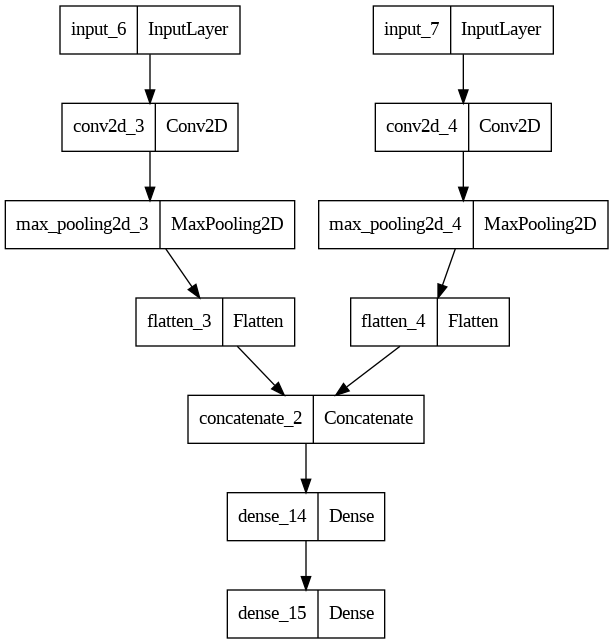

In [13]:
plot_model(model)

## 2. Multiple Output Model

- 2개의 서로 다른 type 의 prediction 을 출력하는 model  
- 100 timestep 1 feature 의 경우 가정  
- 이 model 은 sequence 를 분류하면서 동시에 같은 길이의 새로운 sequence 를 출력한다.  
- LSTM layer 가 input sequence 를 interpret 하고 각 timestep 별로 hidden state 반환  
- 첫번째 output model 은 stacked LSTM 으로 feature 를 interpret 하고 binary prediction 수행  
- 두번째 output model 은 같은 output layer 를 이용하여 각 timestep 에 대해 real value prediction

이러한 형태의 모델은 다음과 같은 상황에서 사용될 수 있습니다:

- 다중 작업 학습 (Multi-task learning): 예를 들어, 의료 분야에서 환자의 의료 기록 데이터를 분석하는 경우입니다. 전체 시퀀스에 대한 분류 출력은 환자가 특정 질병을 앓고 있는지를 예측할 수 있으며 (예: 암 여부), 시퀀스 출력은 각 시간 단계에서의 환자 상태 (예: 심박수, 혈압 등)를 예측할 수 있습니다.

- 동시적 시퀀스 분류 및 예측: 이는 예를 들어 금융 시장에서 주가 데이터를 분석하는 경우에 사용될 수 있습니다. 분류 출력은 주식의 전반적인 추세 (예: 상승 또는 하락)를 예측하는 데 사용될 수 있으며, 시퀀스 출력은 각 시간 단계에서의 주식 가격을 예측하는 데 사용될 수 있습니다.

- 자연어 처리: 이 구조는 문장이나 문서에서 감정을 분석하면서 동시에 각 단어나 구절에 대한 정보를 추출하는 작업에도 사용될 수 있습니다.

In [14]:
# 100개의 시간 단계를 가진 단변량 시계열 데이터를 가정
inp = Input(shape=(100, 1))

# 이는 10개의 유닛을 가진 LSTM 피처 추출기를 정의
# return_sequences=True로 설정되어 시퀀스의 모든 시간 단계에서 출력을 반환
extract = LSTM(10, return_sequences=True)(inp)

# 첫 번째 출력을 정의합니다. 이는 분류 출력입니다.
# 또 다른 LSTM 레이어와 두 개의 밀집 레이어로 구성되며, 최종적으로 시그모이드 활성화 함수를 사용하는 레이어로 이어집니다.
x = LSTM(10)(extract)
x = Dense(10, activation='relu')(x)
output1 = Dense(1, activation='sigmoid')(x)

# 두 번째 출력을 정의합니다. 이는 시퀀스 출력입니다.
# TimeDistributed 레이어와 밀집 레이어를 사용하여 시퀀스의 각 시간 단계에서 출력을 생성합니다.
output2 = TimeDistributed(Dense(1, activation='relu'))(extract)

# Model 객체를 생성하여 신경망 모델을 정의합니다. 이 모델은 입력과 두 개의 출력으로 구성되어 있습니다.
model = Model(inputs=inp, outputs=[output1, output2])

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 100, 1)]             0         []                            
                                                                                                  
 lstm_2 (LSTM)               (None, 100, 10)              480       ['input_8[0][0]']             
                                                                                                  
 lstm_3 (LSTM)               (None, 10)                   840       ['lstm_2[0][0]']              
                                                                                                  
 dense_16 (Dense)            (None, 10)                   110       ['lstm_3[0][0]']              
                                                                                            

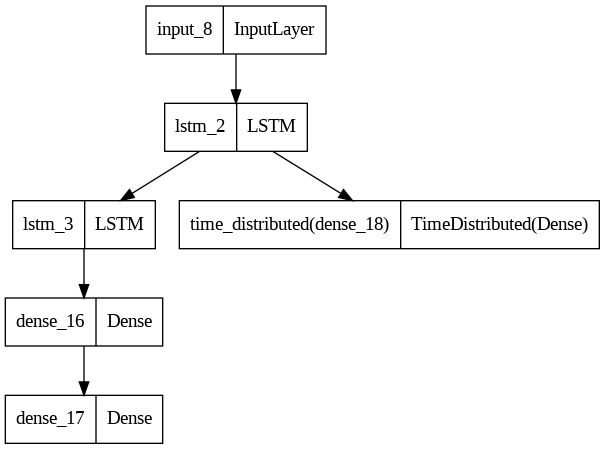

In [15]:
plot_model(model)